<a href="https://colab.research.google.com/github/yweslakarep123/diamond/blob/main/diamond_price_prediction_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [4]:
!chmod 600 /content/kaggle.json

chmod: cannot access '/content/kaggle.json': No such file or directory


In [5]:
!kaggle datasets download -d shivam2503/diamonds

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /content. Or use the environment method.


In [6]:
!pip install patool pyunpack

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 2.4 MB/s eta 0:00:00


In [7]:
from pyunpack import Archive
zip_file_path = '/content/diamonds.zip'
extract_directory = '/content/drive/MyDrive/Test_dataset'
# Buka dan ekstrak file ZIP menggunakan patool
Archive(zip_file_path).extractall(extract_directory)

# Output pesan jika ekstraksi selesai
print("Ekstraksi selesai.")


ValueError: archive file does not exist:/content/diamonds.zip

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Test_dataset/diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [12]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
df.rename(columns={'depth': 'total depth percentage','x': 'length', 'y': 'width', 'z': 'depth'}, inplace=True)

In [10]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,total depth percentage,table,price,length,width,depth
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              53940 non-null  int64  
 1   carat                   53940 non-null  float64
 2   cut                     53940 non-null  object 
 3   color                   53940 non-null  object 
 4   clarity                 53940 non-null  object 
 5   total depth percentage  53940 non-null  float64
 6   table                   53940 non-null  float64
 7   price                   53940 non-null  int64  
 8   length                  53940 non-null  float64
 9   width                   53940 non-null  float64
 10  depth                   53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.9+ MB


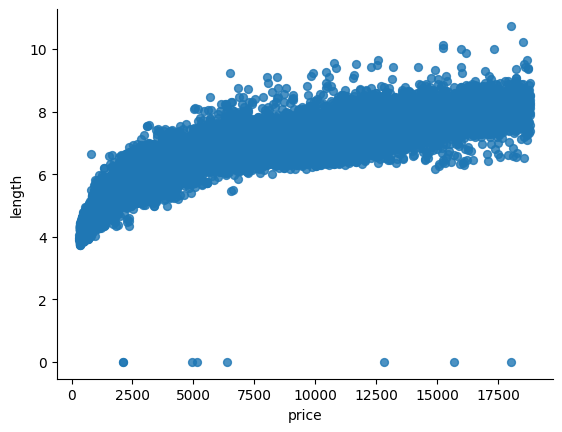

In [13]:
# @title price vs length

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='price', y='length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-14-832435c67f7e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='carat', y='color', inner='box', palette='Dark2')


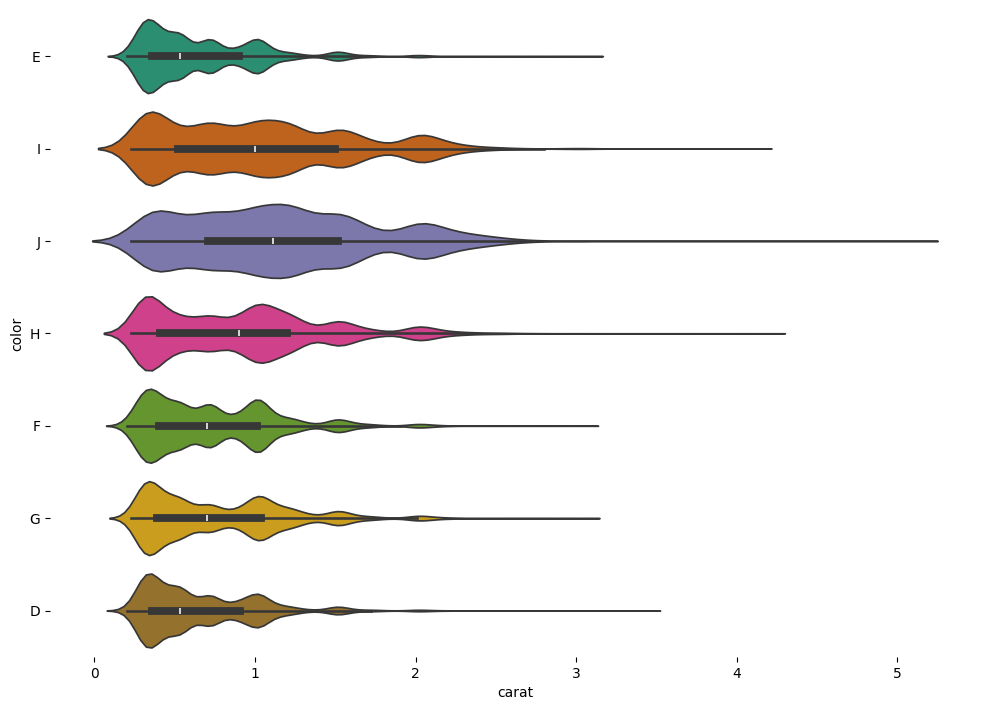

In [14]:
# @title color vs carat

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['color'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='carat', y='color', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-15-68646f1adaad>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='carat', y='cut', inner='box', palette='Dark2')


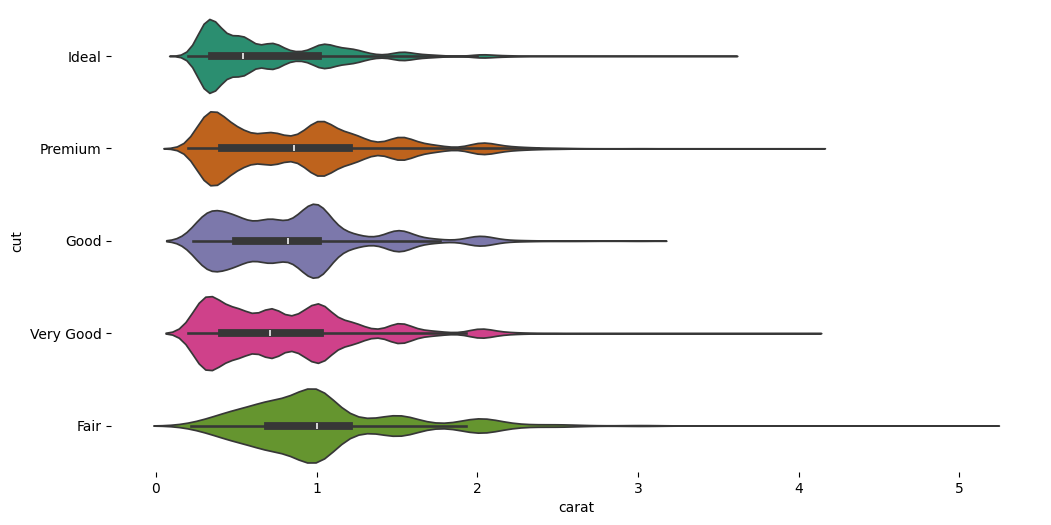

In [15]:
# @title cut vs carat

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['cut'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='carat', y='cut', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

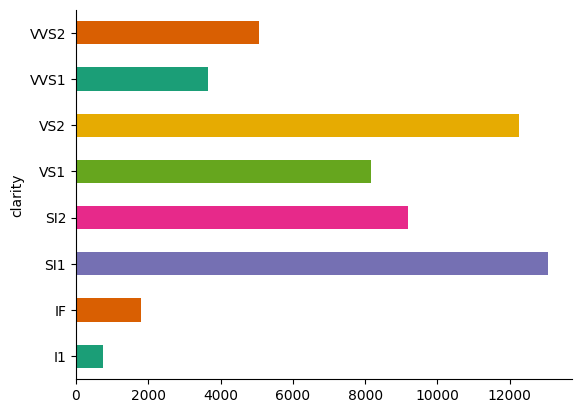

In [16]:
# @title clarity

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('clarity').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

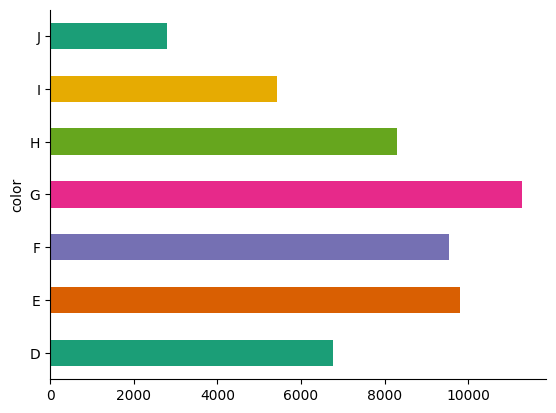

In [17]:
# @title color

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('color').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

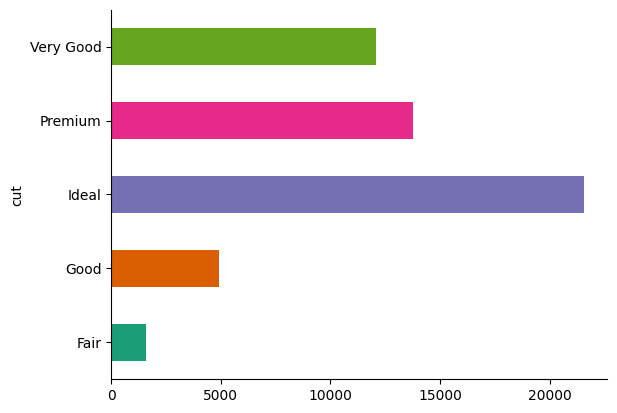

In [18]:
# @title cut

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('cut').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

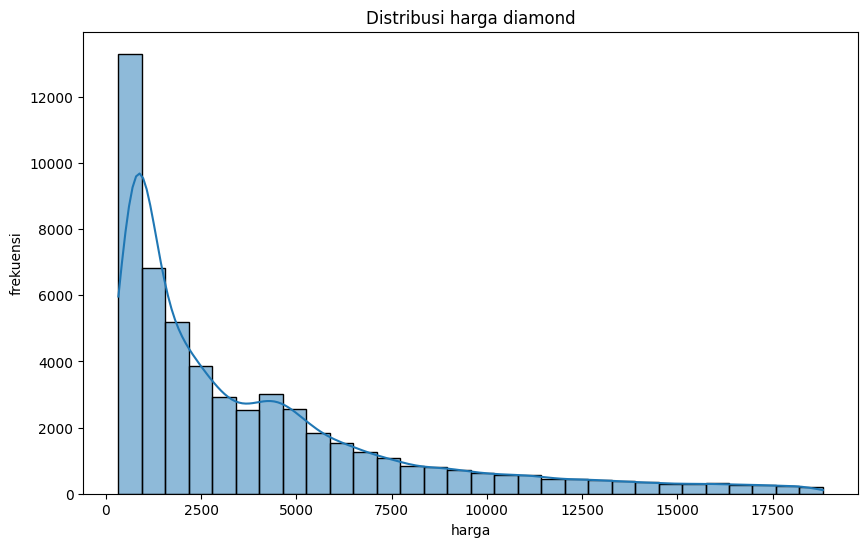

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribusi harga diamond')
plt.xlabel('harga')
plt.ylabel('frekuensi')
plt.show()

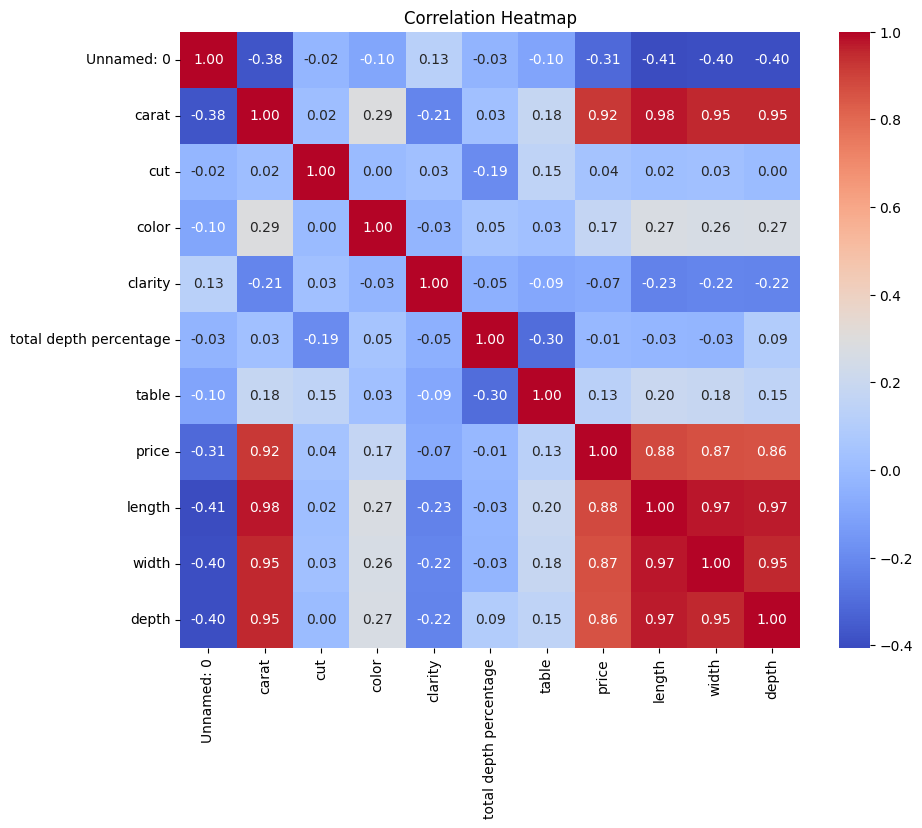

In [20]:
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

warnings.filterwarnings("ignore")
dt = (df.dtypes == "object")
object_cols = list(dt[dt].index)
label_data = df.copy()
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
correlation_matrix = label_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [26]:
df_encoded = df.copy()
label_encoder = LabelEncoder()
for col in object_cols:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

X = df_encoded.drop(columns=['price'])
y = df_encoded['price']

In [22]:
# scaler = StandardScaler()

In [23]:
# X = scaler.fit_transform(X)

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.compose import ColumnTransformer

In [30]:
column_transformer = ColumnTransformer(
    [('onehot', OneHotEncoder(), object_cols)],
    remainder='passthrough'
)

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

In [33]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

In [34]:
reg1 = GradientBoostingRegressor(random_state=1,n_estimators=100)
reg2 = RandomForestRegressor(random_state=1, n_estimators=100)
reg3 = LinearRegression()

reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)

ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg.fit(X_train, y_train)

VotingRegressor(estimators=[('gb', GradientBoostingRegressor(random_state=1)),
                            ('rf', RandomForestRegressor(random_state=1)),
                            ('lr', LinearRegression())])

In [35]:
xt = X_train[:20]

pred1 = reg1.predict(xt)
pred2 = reg2.predict(xt)
pred3 = reg3.predict(xt)
pred4 = ereg.predict(xt)

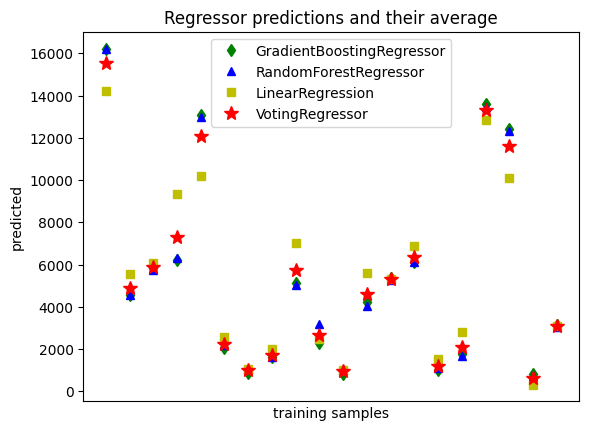

In [36]:
plt.figure()
plt.plot(pred1, "gd", label="GradientBoostingRegressor")
plt.plot(pred2, "b^", label="RandomForestRegressor")
plt.plot(pred3, "ys", label="LinearRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()

In [37]:
cv_scores = cross_val_score(reg1, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

cv_scores = cross_val_score(reg2, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

cv_scores = cross_val_score(reg3, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.99700645 0.99695983 0.99672464 0.9963686  0.99751508]
Mean CV Score: 0.9969149208675882
Cross-Validation Scores: [0.99984704 0.99992751 0.99992259 0.99995282 0.99988803]
Mean CV Score: 0.9999076000470855
Cross-Validation Scores: [0.88739764 0.8818711  0.87767618 0.89179694 0.88776452]
Mean CV Score: 0.8853012742961276


In [38]:
y_train_pred = reg1.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print("\nTraining Set Metrics:")
print("Mean Absolute Error:", train_mae)
print("Mean Squared Error:", train_mse)
print("R-squared Score:", train_r2)

y_train_pred = reg2.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print("\nTraining Set Metrics:")
print("Mean Absolute Error:", train_mae)
print("Mean Squared Error:", train_mse)
print("R-squared Score:", train_r2)

y_train_pred = reg3.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print("\nTraining Set Metrics:")
print("Mean Absolute Error:", train_mae)
print("Mean Squared Error:", train_mse)
print("R-squared Score:", train_r2)


Training Set Metrics:
Mean Absolute Error: 127.9755307250374
Mean Squared Error: 43572.88543632156
R-squared Score: 0.9972629647925099

Training Set Metrics:
Mean Absolute Error: 1.2842095383759868
Mean Squared Error: 155.41772765341122
R-squared Score: 0.9999902374197119

Training Set Metrics:
Mean Absolute Error: 868.8804579042675
Mean Squared Error: 1820577.2531346513
R-squared Score: 0.8856402556340337


In [39]:
y_train_pred = reg1.predict(X_test)
train_mae = mean_absolute_error(y_test, y_train_pred)
train_mse = mean_squared_error(y_test, y_train_pred)
train_r2 = r2_score(y_test, y_train_pred)
print("\nTraining Set Metrics:")
print("Mean Absolute Error:", train_mae)
print("Mean Squared Error:", train_mse)
print("R-squared Score:", train_r2)

y_train_pred = reg2.predict(X_test)
train_mae = mean_absolute_error(y_test, y_train_pred)
train_mse = mean_squared_error(y_test, y_train_pred)
train_r2 = r2_score(y_test, y_train_pred)
print("\nTraining Set Metrics:")
print("Mean Absolute Error:", train_mae)
print("Mean Squared Error:", train_mse)
print("R-squared Score:", train_r2)

y_train_pred = reg3.predict(X_test)
train_mae = mean_absolute_error(y_test, y_train_pred)
train_mse = mean_squared_error(y_test, y_train_pred)
train_r2 = r2_score(y_test, y_train_pred)
print("\nTraining Set Metrics:")
print("Mean Absolute Error:", train_mae)
print("Mean Squared Error:", train_mse)
print("R-squared Score:", train_r2)


Training Set Metrics:
Mean Absolute Error: 127.61390802789442
Mean Squared Error: 40931.50358008977
R-squared Score: 0.9974251768691252

Training Set Metrics:
Mean Absolute Error: 2.8305626622172833
Mean Squared Error: 497.3164620411569
R-squared Score: 0.9999687159811435

Training Set Metrics:
Mean Absolute Error: 862.9888776244617
Mean Squared Error: 1812024.0505481171
R-squared Score: 0.8860134363272641


In [40]:
import pickle

folder_path = '/content/drive/MyDrive/test_model'
filename = folder_path+'hasil_model_diamond.pkl'

with open(filename, 'wb') as file:
    pickle.dump(reg2, file)